##### todolist
1. make visualization with salary for each work type
2. make visualization with salary for full time work type by locations
3. make visualization  to see dependencies between sponsoring post and views

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('LinkedinJobsDF.csv')
df_tmp = df
df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


In [6]:
df.dtypes

Co_Nm               object
Co_Pg_Lstd            bool
Emp_Cnt              int64
Flw_Cnt              int64
Job_Ttl             object
Job_Desc            object
Is_Supvsr             bool
max_sal            float64
med_sal            float64
min_sal            float64
py_prd              object
py_lstd               bool
wrk_typ             object
loc                 object
st_code             object
is_remote            int64
views                int64
app_typ             object
app_is_off            bool
xp_lvl              object
domain              object
has_post_domain       bool
is_sponsored         int64
base_comp            int64
dtype: object

##### Columns meaning
- Co_Nm / Company Name, dType Object

- Co_Pg_Lstd / Company Page Listed, dType Bool

- Emp_Cnt / Company Employee Count, dType int64

- Flw_Cnt / Company Follower Count, dType int64

- Job_Ttl / Job Title, dType Object

- Job_Desc / Job Description, dtype Object

- Is_Supvsr / Is Post a Supervisor Position (Calculated), dType Bool

- max_sal / Maximum Salary, dtype Float64

- med_sal / Median Salary, dtype Float64

- min_sal / Minimum Salary, dtype Float64

- py_prd / Pay Period, dtype Category {Not Listed, YEARLY, HOURLY, MONTHLY, Unpaid, WEEKLY, ONCE}

- py_lstd / Pay Listed (Calculated), dtype Bool 

- wrk_typ / Work Type, dtype Category {Full-time, Contract, Part-time, Temporary, Internship, Other, Volunteer}

- loc / Job Location, dtype Object

- st_code / Job State Code (Calculated), dtype Object

- is_remote / Is Job Remote (Calculated), dtype Bool

- views / Number of Posting Views, dtype int64

- app_typ / Application Type, dtype Category {Offsite Apply, SimpleOnSiteApply, ComplexOnSiteApply}

- app_is_off / Is Application Offsite (Calculated), dtype Bool

- xp_lvl / Experience Level, dtype Category {Mid-Senior level, Not Listed, Entry level, Associate, Director, Internship, Executive}

- domain / Posting Domain, dtype Object

- has_post_domain / Has Posting Domain (Calculated), dtype Bool

- is_sponsored / Is Sponsored, dtype Bool

- base_comp / Has Base Compensation, dtype Bool.

In [7]:
num_col = ['Emp_Cnt','Flw_Cnt','max_sal','med_sal','min_sal','views']

corr_matrix = df[num_col].corr()

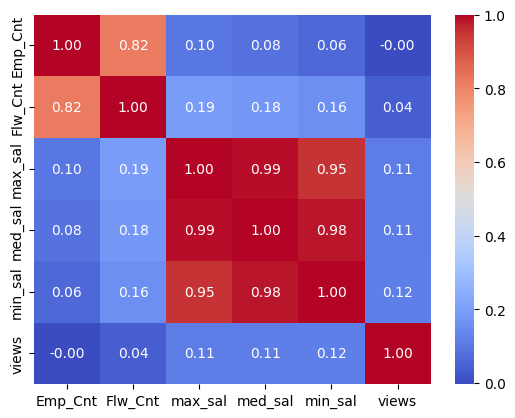

In [8]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [9]:
df = df.groupby('Emp_Cnt').count().reset_index()
df

,Emp_Cnt,Co_Nm,Co_Pg_Lstd,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,0,854,854,854,854,854,854,854,854,854,...,854,854,854,854,854,854,15,854,854,854
1,1,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,24,180,180,180
2,2,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,9,200,200,200
3,3,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,159,8,159,159,159
4,4,224,224,224,224,224,224,224,224,224,...,224,224,224,224,224,224,53,224,224,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,437314,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
3825,538566,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3826,542886,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3827,567835,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,11,21,21,21


In [10]:
for col in num_col:
    df = df.groupby(col).count().reset_index()
df.head()
    #sns.pairplot(df[n])
#plt.show()

,views,min_sal,med_sal,max_sal,Flw_Cnt,Emp_Cnt,Co_Nm,Co_Pg_Lstd,Job_Ttl,Job_Desc,...,loc,st_code,is_remote,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


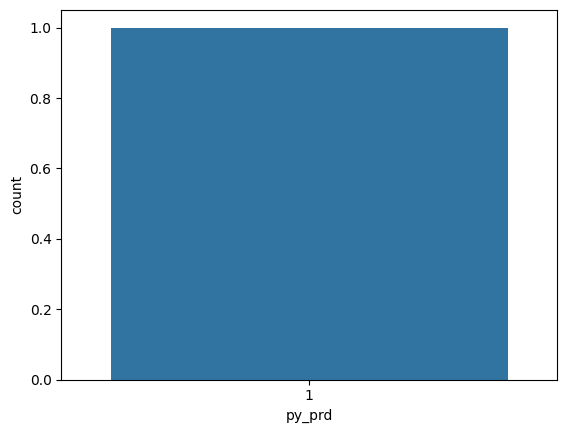

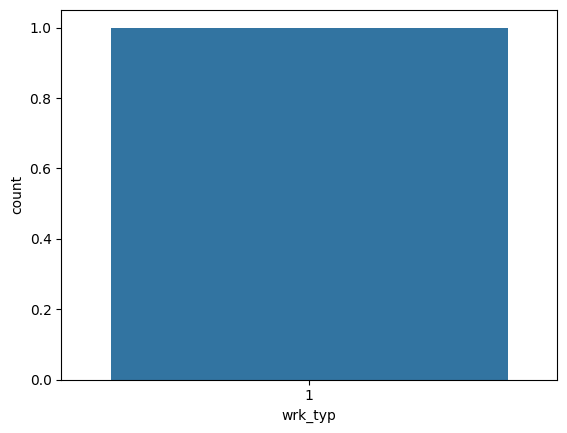

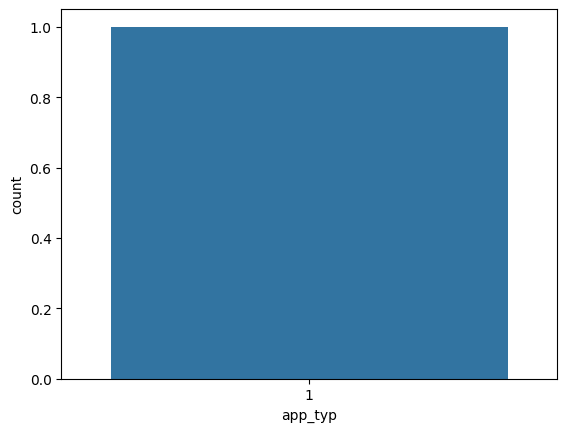

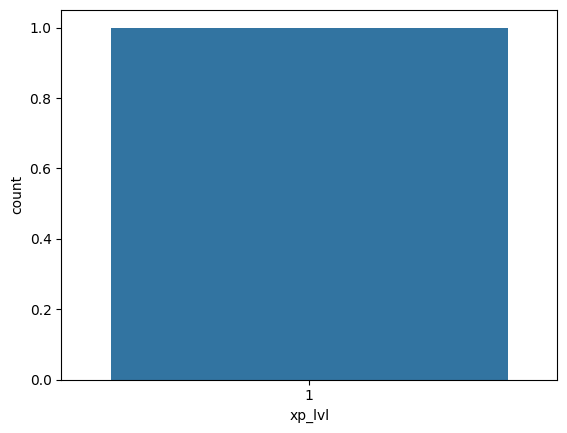

In [11]:
categorical_col = ['py_prd','wrk_typ','app_typ','xp_lvl']

for col in categorical_col:
    sns.countplot(x=col, data=df)
    plt.show()

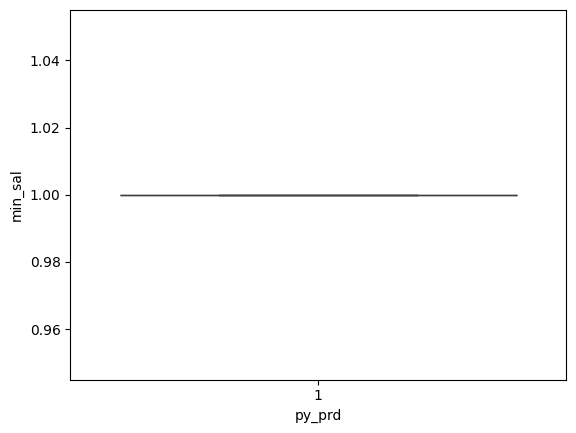

In [12]:
sns.boxplot(x='py_prd',y='min_sal',data=df)
plt.show()

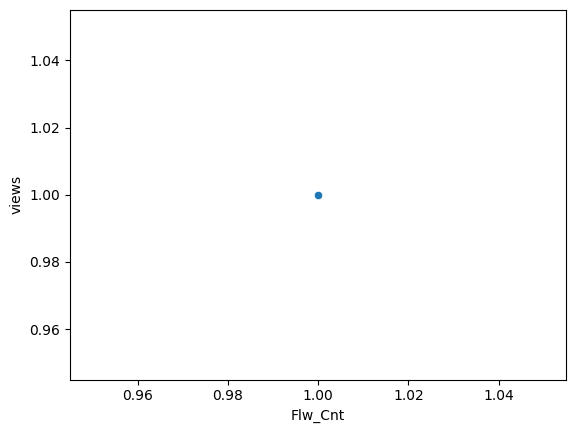

In [13]:
sns.scatterplot(x='Flw_Cnt', y='views', data=df)
plt.show()

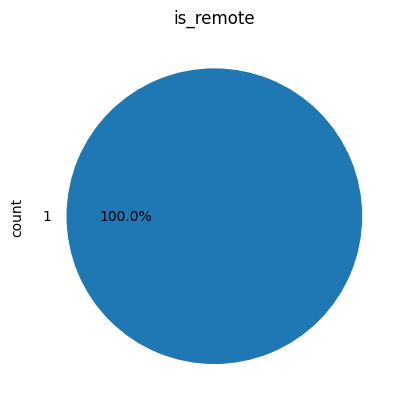

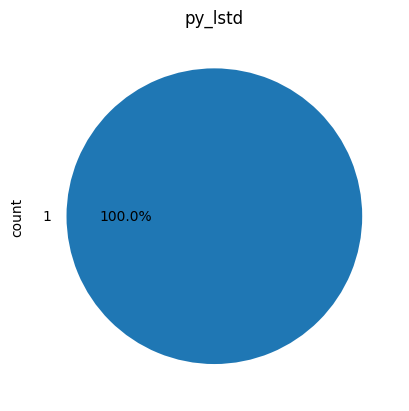

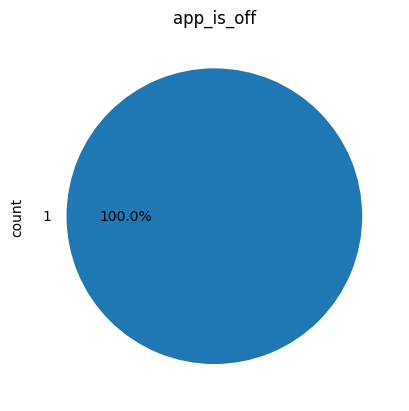

In [14]:
bool_col = ['is_remote', 'py_lstd', 'app_is_off']

for col in bool_col:
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(col)
    plt.show()